In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df_hp = pd.read_csv(r"C:\Users\Keara\Downloads\Intro_Data_Science_with_Python\house_pricing.csv")

In [4]:
df_hp.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
5,50,85.0,14115,5,5,1993,1995,0.0,732,0,...,40,30,0,320,0,0,700,10,2009,143000
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,...,255,57,0,0,0,0,0,8,2007,307000
7,60,NaN,10382,7,6,1973,1973,240.0,859,32,...,235,204,228,0,0,0,350,11,2009,200000
8,50,51.0,6120,7,5,1931,1950,0.0,0,0,...,90,0,205,0,0,0,0,4,2008,129900
9,190,50.0,7420,5,6,1939,1950,0.0,851,0,...,0,4,0,0,0,0,0,1,2008,118000


In [3]:
#selection of some columns
sel_cols = ['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt',
            'GarageArea', 'SalePrice']

df = df_hp[sel_cols]
df = df.loc[0:10]

In [5]:
df.head(10)

,LotFrontage,LotArea,YearBuilt,GrLivArea,GarageYrBlt,GarageArea,SalePrice
0,65.0,8450,2003,1710,2003.0,548,208500
1,80.0,9600,1976,1262,1976.0,460,181500
2,68.0,11250,2001,1786,2001.0,608,223500
3,60.0,9550,1915,1717,1998.0,642,140000
4,84.0,14260,2000,2198,2000.0,836,250000
5,85.0,14115,1993,1362,1993.0,480,143000
6,75.0,10084,2004,1694,2004.0,636,307000
7,NaN,10382,1973,2090,1973.0,484,200000
8,51.0,6120,1931,1774,1931.0,468,129900
9,50.0,7420,1939,1077,1939.0,205,118000


In [6]:
x = df['GrLivArea'].values #get column Live Area
y = df['SalePrice'].values #get column Sale Price

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [7]:
#decision tree regression
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0, max_depth = 2) 
regressor.fit(x, y)

y_pred = regressor.predict(x)

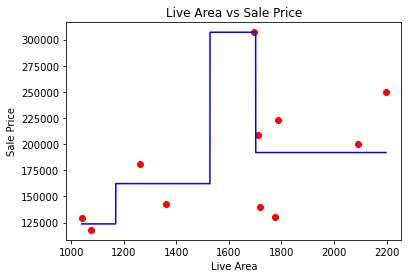

In [8]:
#sort x
s_x = np.sort(x, axis = None).reshape(-1, 1)

plt.figure()
x_grid = np.arange(min(s_x), max(s_x), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, regressor.predict(x_grid), color = 'blue')
plt.title('Live Area vs Sale Price')
plt.xlabel('Live Area')
plt.ylabel('Sale Price')
plt.show()

In [9]:
#finding error
msqe = sum((y_pred - y) * (y_pred - y)) / y.shape[0]
rmse = np.sqrt(msqe)
print(rmse)

[ 57499.96815985  61260.73004343  57499.96815985  57499.96815985
  57499.96815985  61260.73004343 135008.21860505  57499.96815985
  57499.96815985  83415.6882454   83415.6882454 ]


In [13]:
df_hp = pd.read_csv(r"C:\Users\Keara\Downloads\Intro_Data_Science_with_Python\house_pricing2.csv")

In [14]:
#selection of some columns
sel_cols = ['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt',
            'GarageArea', 'Heating', 'SalePrice']
df = df_hp[sel_cols]

x = df.iloc[:, : -1].values
y = df.iloc[: , 7].values

print(x)

print(df.isnull().sum())


[[65.0 8450 2003 ... 2003.0 548 'GasA']
 [80.0 9600 1976 ... 1976.0 460 'GasA']
 [68.0 11250 2001 ... 2001.0 608 'GasA']
 ...
 [78.0 11344 1958 ... 1958.0 315 'GasW']
 [60.0 10440 1920 ... 1920.0 520 'GasW']
 [60.0 8520 1916 ... 1916.0 216 'GasW']]
LotFrontage    256
LotArea          0
YearBuilt        0
GrLivArea        0
GarageYrBlt     76
GarageArea       0
Heating          0
SalePrice        0
dtype: int64


In [15]:
#encoding the categorical variable (heating)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('encoder', OneHotEncoder(), [6])], remainder = 'passthrough')
x = np.array(ct.fit_transform(x))

x = x.astype(float)

In [16]:
#avoid dummy variable duplications
x = x[:, 1:]

In [17]:
#imputation for lotFrontage and garageYrBlt
from sklearn.impute import SimpleImputer
missingvalues = SimpleImputer(missing_values = np.nan, strategy = 'median', verbose = 0)
missingvalues = missingvalues.fit(x[:, 1:])
x[:, 1:] = missingvalues.transform(x[:, 1:])

In [18]:
#split dataset into train and test splits
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [19]:
#decision tree regression
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth = 3, random_state = 0) 
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

In [20]:
#finding error
msqe = sum((y_pred - y_test) * (y_pred - y_test)) / y_test.shape[0]
rmse = np.sqrt(msqe)
print(rmse)

51387.34746792038
